In [2]:
from os import error

import numpy as np
import pandas as pd
from matplotlib.lines import lineStyles
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sympy.printing.pretty.pretty_symbology import line_width

warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('Salary_Data.csv')

In [10]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [11]:
df.shape

(30, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [13]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
#any outliers
# Skewness measures the asymmetry of the distribution
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

Skewness:
 YearsExperience    0.360312
Salary             0.336162
dtype: float64
Kurtosis:
 YearsExperience   -1.044752
Salary            -1.282913
dtype: float64


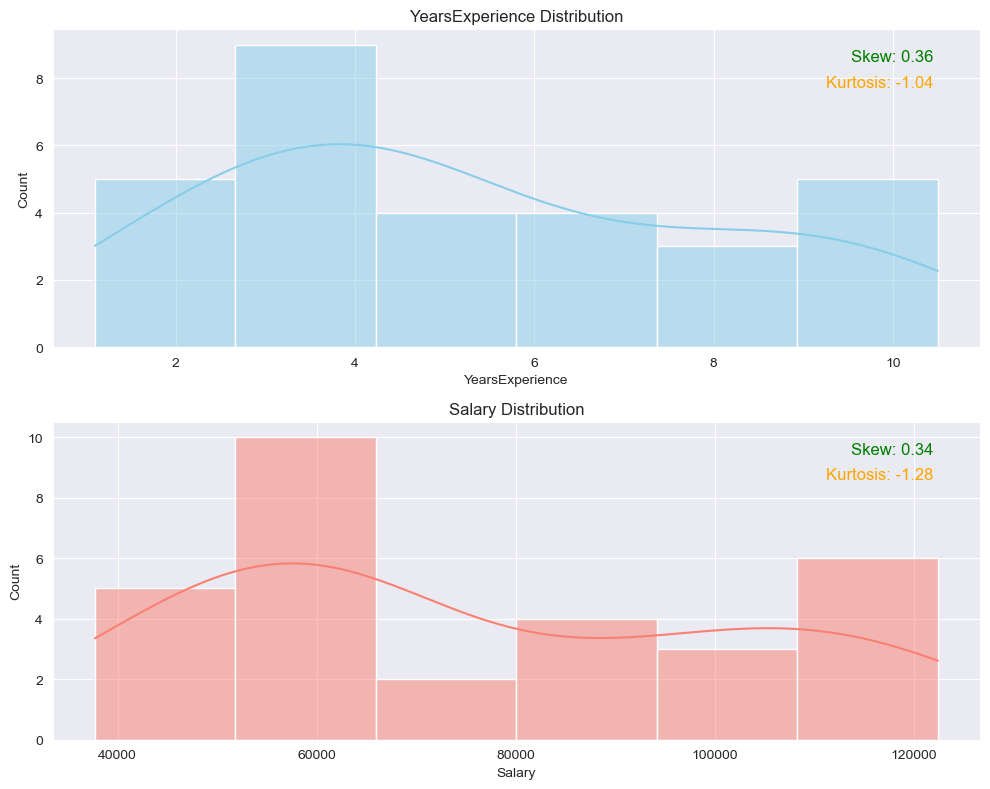

In [23]:
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (skip this if you already have df)
# df = pd.read_csv('your_file.csv')

# Calculate skewness and kurtosis
skew_vals = df.apply(skew)
kurt_vals = df.apply(kurtosis)

# Print values
print("Skewness:\n", skew_vals)
print("Kurtosis:\n", kurt_vals)

# Plotting distributions
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot YearsExperience
sns.histplot(df['YearsExperience'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("YearsExperience Distribution")
axes[0].annotate(f"Skew: {skew_vals['YearsExperience']:.2f}", 
                 xy=(0.95, 0.90), xycoords='axes fraction', color='green', fontsize=12, ha='right')
axes[0].annotate(f"Kurtosis: {kurt_vals['YearsExperience']:.2f}", 
                 xy=(0.95, 0.82), xycoords='axes fraction', color='orange', fontsize=12, ha='right')

# Plot Salary
sns.histplot(df['Salary'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Salary Distribution")
axes[1].annotate(f"Skew: {skew_vals['Salary']:.2f}", 
                 xy=(0.95, 0.90), xycoords='axes fraction', color='green', fontsize=12, ha='right')
axes[1].annotate(f"Kurtosis: {kurt_vals['Salary']:.2f}", 
                 xy=(0.95, 0.82), xycoords='axes fraction', color='orange', fontsize=12, ha='right')

plt.tight_layout()
plt.show()

In [18]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

 Kurtosis: What It Means
Kurtosis measures the "tailedness" of a distribution—how much of the data falls in the extreme ends (tails) compared to a normal (Gaussian) distribution.

There are three types:

Mesokurtic (kurtosis ≈ 0):

Normal distribution (e.g., bell curve).

Moderate tails and a moderate peak.

Leptokurtic (kurtosis > 0):

High peak, fat tails.

More data in the tails → more outliers.

Platykurtic (kurtosis < 0):

Flat peak, thin tails.

Data is more evenly spread out with fewer outliers.

🔸 Your Salary Kurtosis: -1.28
This is platykurtic. Here's what that means:

The distribution is flatter than a normal distribution.

The salaries are spread out more evenly across the range.

There are fewer extreme salary values (very high or very low).

Suggests low concentration of outliers or unusual salaries.

🧠 Why This Matters for Salary Modeling:

Predictability: Lower kurtosis means salaries are more predictable (less prone to extreme values).

Modeling: Regression models might perform well, as outliers won’t skew the fit too much.

Risk Analysis: In finance or HR planning, fewer outliers means lower risk in budget forecasting or benchmarking.


In [19]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [24]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


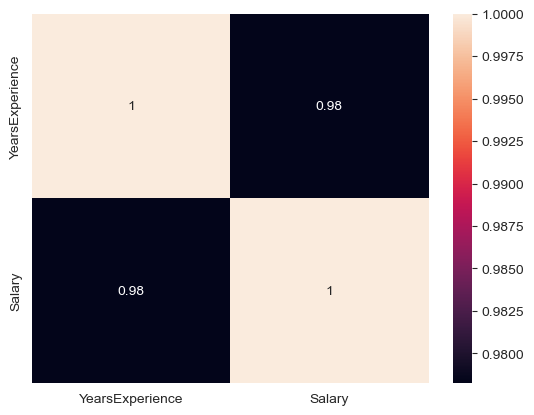

In [25]:
sns.heatmap(df.corr(), annot=True)
plt.show()

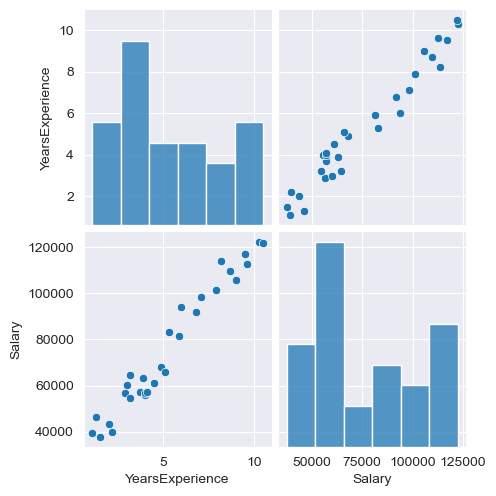

In [26]:
sns.pairplot(df)
plt.show()

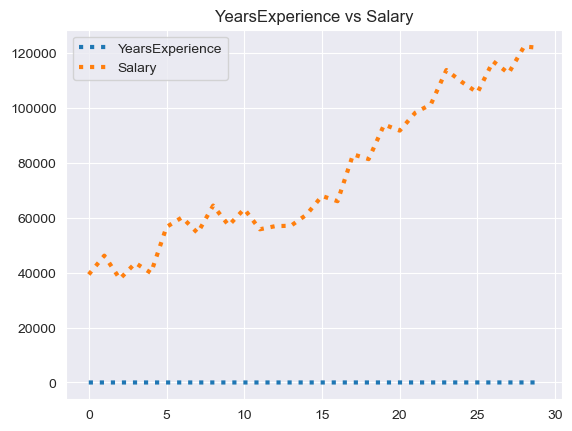

In [29]:
df.plot.line(linestyle = ':', linewidth= '3')

plt.title('YearsExperience vs Salary')
plt.show()

In [30]:
X = df.drop('Salary', axis=1)

In [33]:
y= df['Salary']

In [34]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [35]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [36]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
print(X_train.shape)

(21, 1)


In [38]:
X_test.shape

(9, 1)

In [40]:
# Model Fitting
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr.intercept_

26777.391341197625

In [43]:
lr.coef_

array([9360.26128619])

In [44]:
# Prediction
y_pred = lr.predict(X_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [45]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

In [47]:
# Evaluation
from sklearn import metrics
R2 = metrics.r2_score(y_test, y_pred)
R2

0.9740993407213511

In [49]:
print(metrics.mean_absolute_error(y_test, y_pred))

3737.417861878896


In [53]:
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(lr.predict([[5]]))

23370078.800832972
4834.260936361728
[73578.69777217]


In [54]:
#Assumptions
error = y_test-y_pred
error

2    -3086.783270
28    -797.082589
13   -8073.462615
10     -64.410357
26    1269.126440
24    1219.335469
27   -4000.899689
11   -8424.436486
17    6701.223842
Name: Salary, dtype: float64

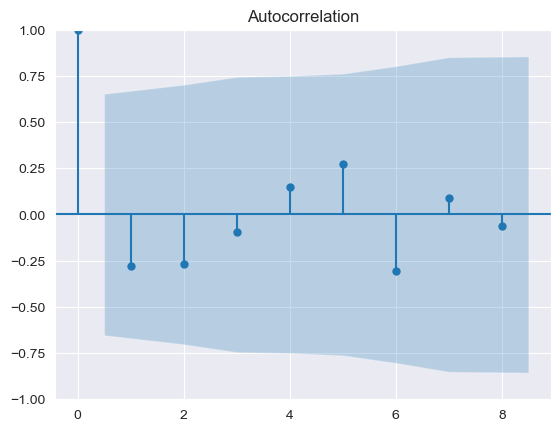

In [55]:
# No Autocorrelation
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(error)
plt.show()

Normality

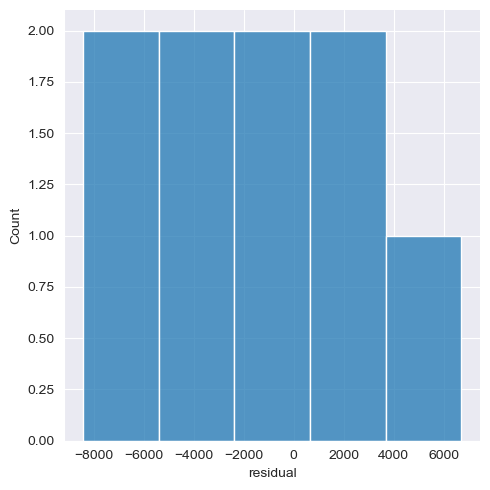

In [56]:
sns.displot(error)
plt.xlabel('residual')
plt.show()

Linearity

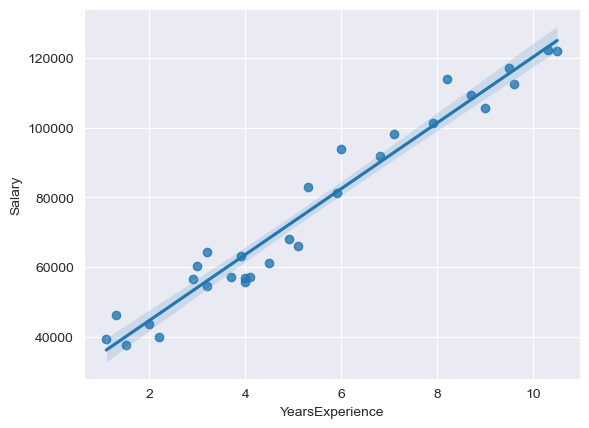

In [59]:
sns.regplot(x=X, y=y)
plt.show()

Homoscedasticity

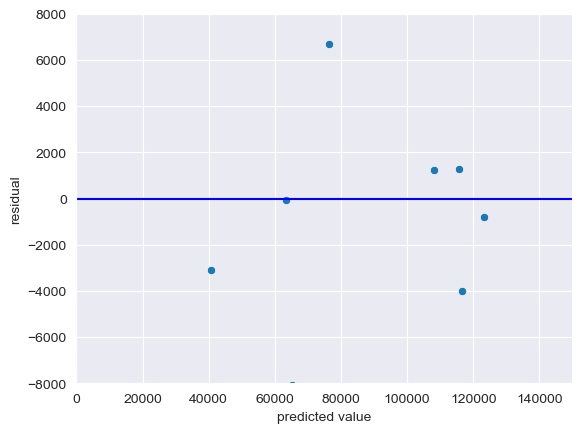

In [61]:
sns.scatterplot(x=y_pred, y=error)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
sns.lineplot(x=[0,150000],y=[0,0],color='blue')
plt.show()